


# **Transformations - Translations and Rotations**

In this lesson we'll learn to:
1. Perform Image Translations
2. Rotations with getRotationMatrix2D
3. Rotations with Transpose
4. Flipping Images

In [1]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Download and unzip our images
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

--2022-09-19 01:44:02--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.150.138
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.150.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  28.22M  2.71MB/s    in 14s     

2022-09-19 01:44:16 (2.04 MB/s) - ‘images.zip’ saved [29586716/29586716]



### **Translations**

This an affine transform that simply shifts the position of an image. (left or right).

We use cv2.warpAffine to implement these transformations.

```cv2.warpAffine(image, T, (width, height))```

![](https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/warp.png)

In [13]:
#이미지 가져오기
image = cv2.imread('images/Volleyball.jpeg')
imshow("Original", image)

# 이미지의 가로와 세로를 저장하자
height, width = image.shape[:2]
print(image.shape)

# 크기를 1/4로 바꾸자
quarter_height , quarter_width = height/4, width/4

# Our Translation
#       | 1 0 Tx |
#  T  = | 0 1 Ty |

# T는 변환행렬이다
T = np.float32([[1, 0, quarter_width],[0, 1,quarter_height]]) 이동행렬
print(T)

#어파인 변환을 변환행렬 T를 이용하여 이미지에 적용해보자
img_trans = cv2.warpAffine(image , T , (width,height)) # (이미지, 이동행렬, 보고싶은 이미지 크기)
imshow("Translated", img_trans)

SyntaxError: ignored

### **Rotations**

```cv2.getRotationMatrix2D(rotation_center_x, rotation_center_y, angle of rotation, scale)```

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/rotation.png)

[[ 6.123234e-17  1.000000e+00  2.800000e+02]
 [-1.000000e+00  6.123234e-17  1.000000e+03]]


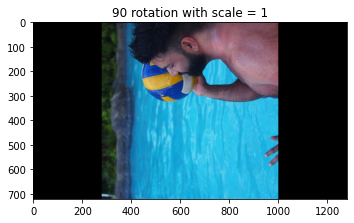

In [14]:
#이미지 가져오기
image = cv2.imread('images/Volleyball.jpeg')
height, width = image.shape[:2]

#회전시켜주는 행렬 만들기(중심, 회전각, 크기)
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 90, 1)
print(rotation_matrix)

#만든 행렬을 적용해보기
rotated_image = cv2.warpAffine(image, rotation_matrix , (width, height)) #(이미지, 회전행렬, 송출 이미지 크기(원본과 같음))
imshow('90 rotation with scale = 1', rotated_image)

[[ 3.061617e-17  5.000000e-01  4.600000e+02]
 [-5.000000e-01  3.061617e-17  6.800000e+02]]


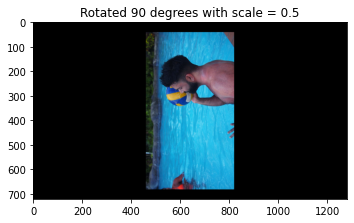

In [17]:
# 크기를 줄여보자
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 90, 0.5)
print(rotation_matrix)

rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
imshow("Rotated 90 degrees with scale = 0.5", rotated_image)



### **Rotations with cv2.transpose** (less flexible)


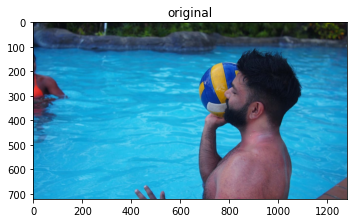

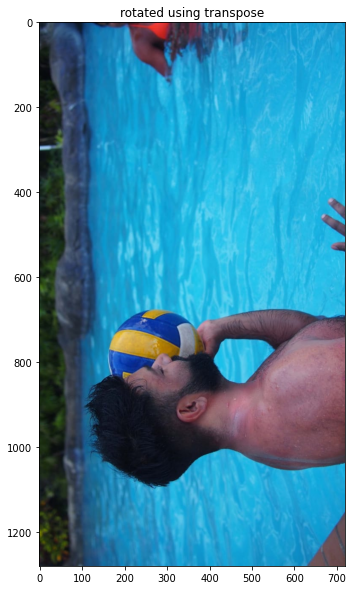

In [18]:
rotated_image = cv2.transpose(image)
imshow("original", image)
imshow("rotated using transpose", rotated_image)

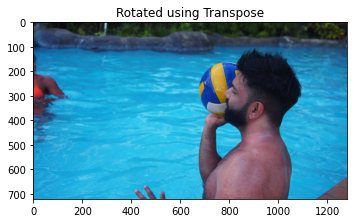

In [19]:
#한번더 전치 시키면 원래 이미지가 나온다.
rotated_image = cv2.transpose(image)
rotated_image = cv2.transpose(rotated_image)

imshow("Rotated using Transpose", rotated_image)

### **cv2.flip()**

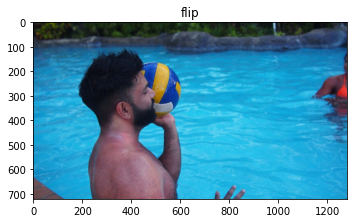

In [25]:
flipped = cv2.flip(image, 1)
imshow("flip" , flipped)